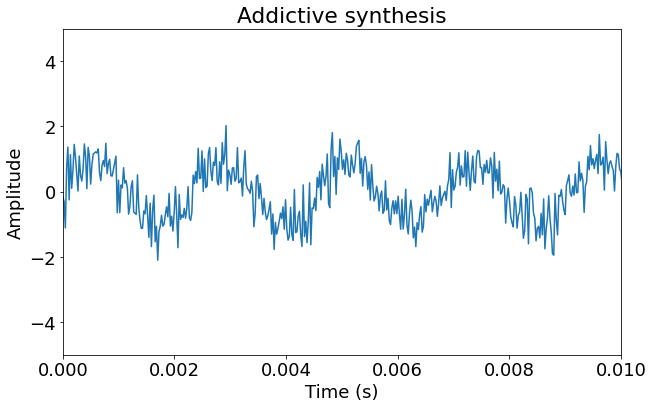

In [ ]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})


dt = 1/44100
t = np.arange(0, 1, dt)
signal = np.sin(2*np.pi*440*t)  #composite signal
signal_clean = signal #copy for later comparison
x = signal + 0.5 * np.random.randn(len(t))
minsignal, maxsignal = signal.min(), signal.max()

plt.plot(t, x)
plt.title('Addictive synthesis')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.ylim(-5, 5)
plt.xlim(0, 0.01)
plt.show()

Audio(data= x , rate=44100)

(0.0, 2000.0)

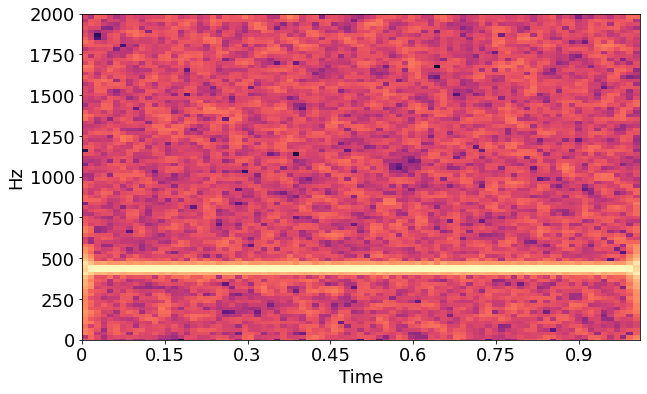

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
librosa.display.specshow(D,y_axis='linear',x_axis='time', sr=44100)
plt.ylim(0,2000)

In [ ]:
def filtering(signal,time):
    if len(time) == 0:
      t = np.arange(0, 1, dt)
    else:
      t = time
    ## Compute Fourier Transform
      n = len(t)
      fhat = np.fft.fft(signal, n) #computes the fft
      psd = fhat * np.conj(fhat)/n
      freq = (1/(dt*n)) * np.arange(n) #frequency array
      idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index
      ## Filter out noise
      threshold = 100
      psd_idxs = (psd > threshold) #array of 0 and 1
      psd_clean = psd * psd_idxs #zero out all the unnecessary powers
      fhat_clean = psd_idxs * fhat #used to retrieve the signal
      signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform
      return signal_filtered,psd

In [ ]:
def visualization(dt, signal,signal_clean,signal_filtered,psd):
    ## Visualization
    t = np.arange(0, 1, dt)
    n = len(t)
    freq = (1/(dt*n))*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype = int)
    minsignal, maxsignal = signal.min(), signal.max()
    fig, ax = plt.subplots(3,1,figsize=(20,20))
    ax[0].plot(t, signal, color='c', lw=0.5, label='Noisy Signal')
    ax[0].plot(t, signal_clean, color='k', lw=1, label='Clean Signal')
    ax[0].set_ylim([minsignal, maxsignal])
    ax[0].set_xlabel('t axis')
    ax[0].set_ylabel('Vals')
    ax[0].set_xlim(0, 0.01)
    ax[0].legend(loc = 1)


    ax[1].plot(t, x, color='r', lw=1, label='Noisy signal')
    ax[1].set_ylim([minsignal, maxsignal])
    ax[1].set_xlabel('t axis')
    ax[1].set_ylabel('Vals')
    ax[1].set_xlim(0, 0.01)
    ax[1].legend()

    ax[2].plot(freq[L],psd[L],color= "c")
    ax[2].set_xlim(0,1000)
    ax[2].set_ylim(0,200)
    ax[2].set_xlabel("Frequency (Hz)")
    ax[2].set_ylabel("PSD")


    plt.subplots_adjust(hspace=1)
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


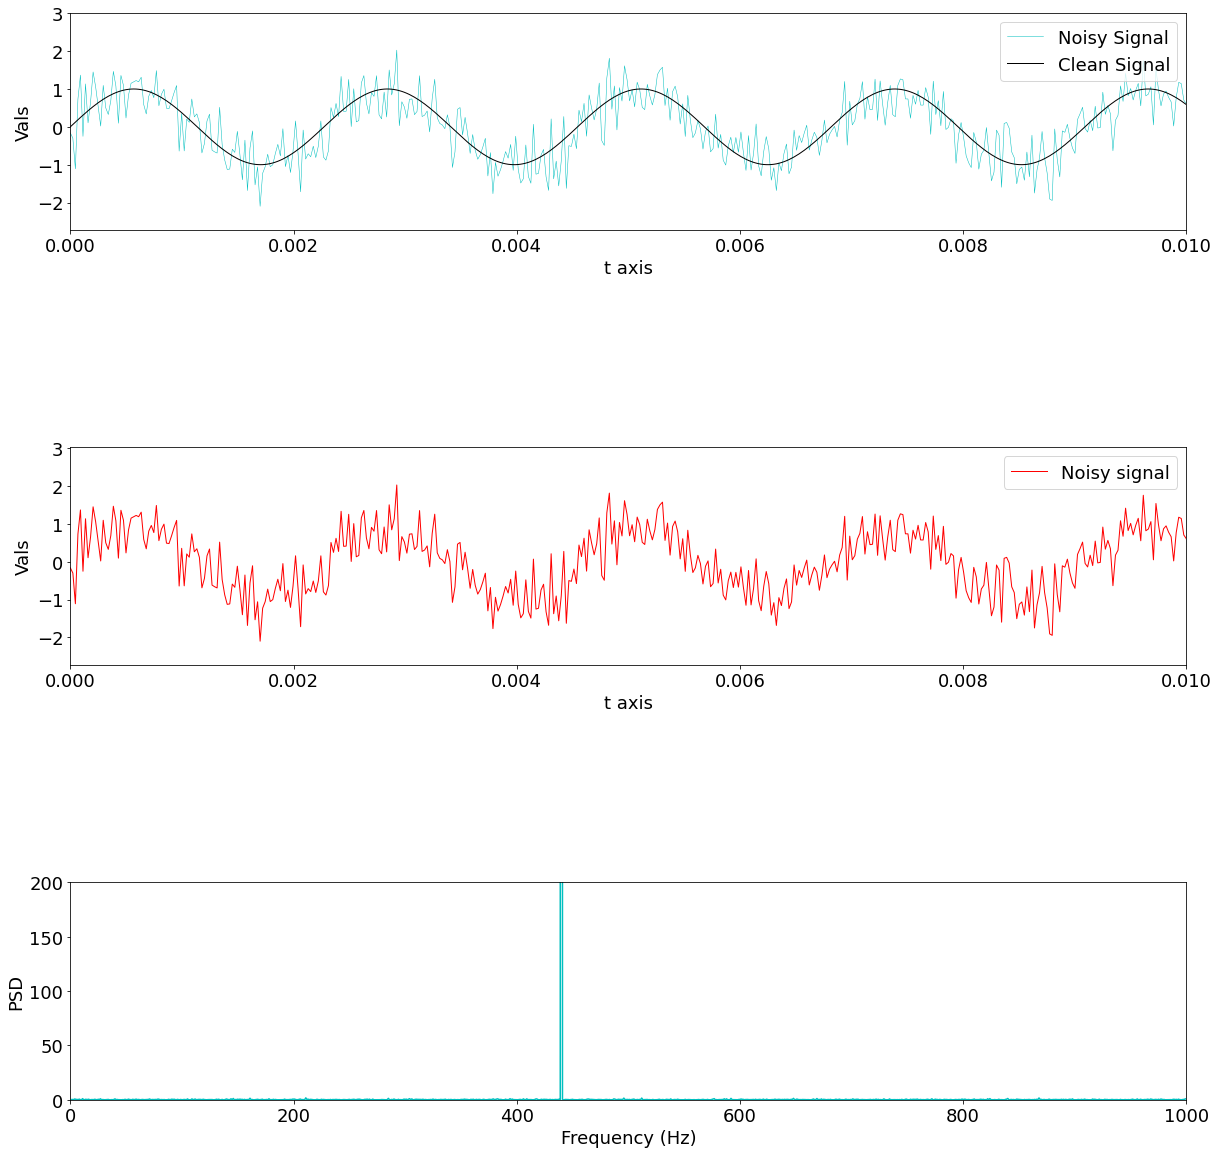

/usr/local/lib/python3.8/dist-packages/IPython/lib/display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
filtered_signal,psd= filtering(x,t)
visualization(dt, x, signal_clean,filtered_signal,psd)
Audio(data= filtered_signal , rate=44100)